<a href="https://colab.research.google.com/github/Jimmy586/MachineLearningJourney/blob/master/GenAi_MLP_CNN_TRANSFERLEARN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10#Base de données
from tensorflow.keras.utils import to_categorical
import tensorflow as tf


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
cifar10_classes = ["Avion", "Automobile", "Oiseau", "Chat", "Cerf",
                   "Chien", "Grenouille", "Cheval", "Bateau", "Camion"]

# Afficher la forme des ensembles d'entraînement et de test
print("Forme de l'ensemble d'entraînement (images) :", x_train.shape)
print("Forme de l'ensemble d'entraînement (étiquettes) :", y_train.shape)
print("Forme de l'ensemble de test (images) :", x_test.shape)
print("Forme de l'ensemble de test (étiquettes) :", y_test.shape)

Forme de l'ensemble d'entraînement (images) : (50000, 32, 32, 3)
Forme de l'ensemble d'entraînement (étiquettes) : (50000, 1)
Forme de l'ensemble de test (images) : (10000, 32, 32, 3)
Forme de l'ensemble de test (étiquettes) : (10000, 1)


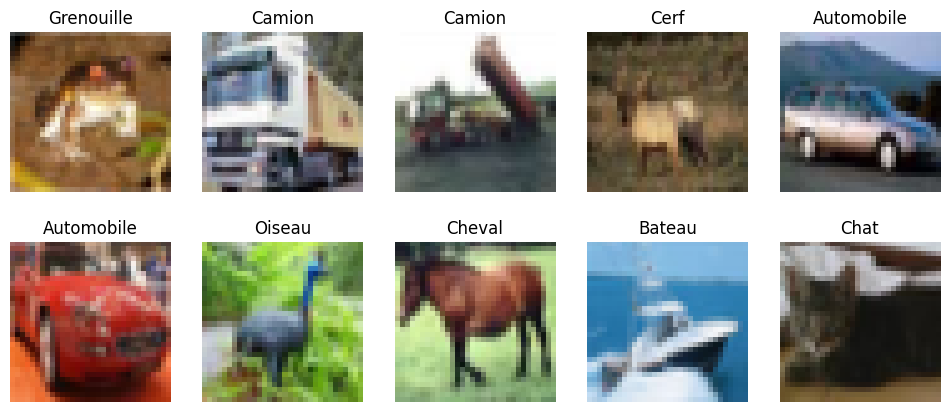

In [4]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(cifar10_classes[y_train[i][0]])
    plt.axis('off')
plt.show()

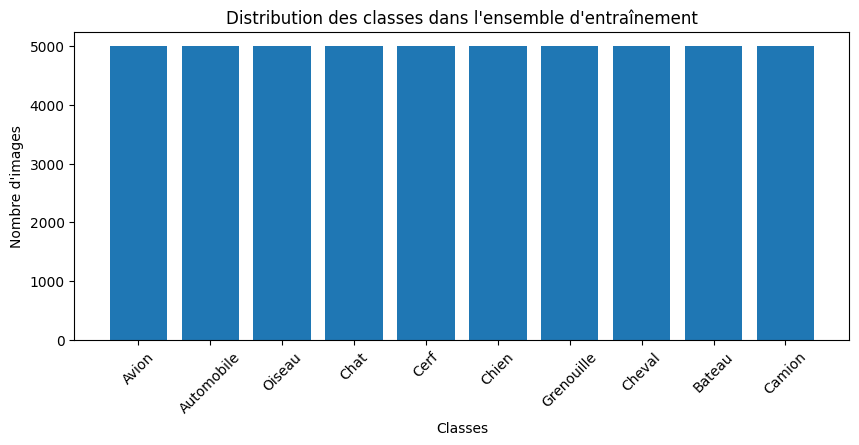

In [5]:
class_distribution = [0] * 10
for label in y_train:
    class_distribution[label[0]] += 1

plt.figure(figsize=(10, 4))
plt.bar(cifar10_classes, class_distribution)
plt.title("Distribution des classes dans l'ensemble d'entraînement")
plt.xlabel("Classes")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=45)
plt.show()

In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
num_classes = 10 #CREATE 10 VECTORS, ONE FOR EACH FEATURE
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [8]:
print("Forme de l'ensemble d'entraînement (images) :", x_train.shape)
print("Forme de l'ensemble de test (images) :", x_test.shape)
print("Forme de l'ensemble d'entraînement (étiquettes) :", y_train.shape)
print("Forme de l'ensemble de test (étiquettes) :", y_test.shape)

Forme de l'ensemble d'entraînement (images) : (50000, 32, 32, 3)
Forme de l'ensemble de test (images) : (10000, 32, 32, 3)
Forme de l'ensemble d'entraînement (étiquettes) : (50000, 10)
Forme de l'ensemble de test (étiquettes) : (10000, 10)


## MLP

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers




# Définir le modèle MLP pour la classification d'images
model_mlp = keras.Sequential([
    # Aplatir les images 32x32 en un vecteur 1D
    layers.Flatten(input_shape=(32, 32, 3)),#3: RVB
    # Ajouter une couche cachée de 128 neurones avec une fonction d'activation ReLU, pour non linearite
    layers.Dense(128, activation='relu'),
    # Ajouter la couche de sortie avec 10 neurones (classes CIFAR-10) et une fonction d'activation softmax
    layers.Dense(10, activation='softmax')
])

In [10]:
model_mlp.compile(optimizer='adam', # Utilisation de l'optimiseur Adam
                  loss='categorical_crossentropy', # Fonction de perte pour la classification multiclasse
                  metrics=['accuracy'])

In [11]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
epochs = 100  # Nombre d'époques
batch_size = 32  # Taille du batch

# Utilisation de la validation split (20% des données pour la validation)
historique = model_mlp.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_mlp.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

Epoch 1/10
625/625 [==============================] - 6s 8ms/step - loss: 1.9253 - accuracy: 0.3063 - val_loss: 1.8284 - val_accuracy: 0.3446
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 1.7611 - accuracy: 0.3731 - val_loss: 1.7432 - val_accuracy: 0.3824
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 1.6982 - accuracy: 0.3951 - val_loss: 1.7244 - val_accuracy: 0.3841
Epoch 4/10
625/625 [==============================] - 5s 7ms/step - loss: 1.6611 - accuracy: 0.4080 - val_loss: 1.7326 - val_accuracy: 0.3790
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 1.6319 - accuracy: 0.4186 - val_loss: 1.6739 - val_accuracy: 0.4024
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 1.6030 - accuracy: 0.4329 - val_loss: 1.6325 - val_accuracy: 0.4284
Epoch 7/10
625/625 [==============================] - 5s 7ms/step - loss: 1.5844 - accuracy: 0.4360 - val_loss: 1.6817 - val_accuracy: 0.4129
Epoch 

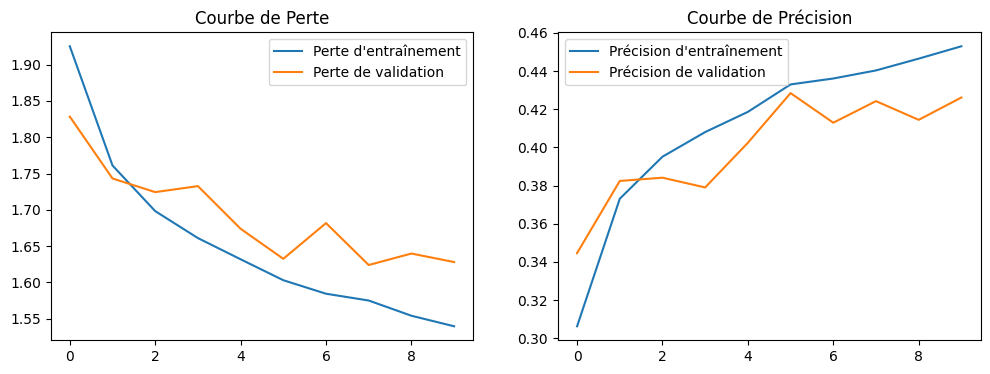

Précision sur les données de test : 43.57%


In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(historique.history['loss'], label='Perte d\'entraînement')
plt.plot(historique.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(historique.history['accuracy'], label='Précision d\'entraînement')
plt.plot(historique.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les classes
CLASSES = np.array([
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion",
])

# Prédire les classes pour les données de test
predictions = model_mlp.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 2ms/step


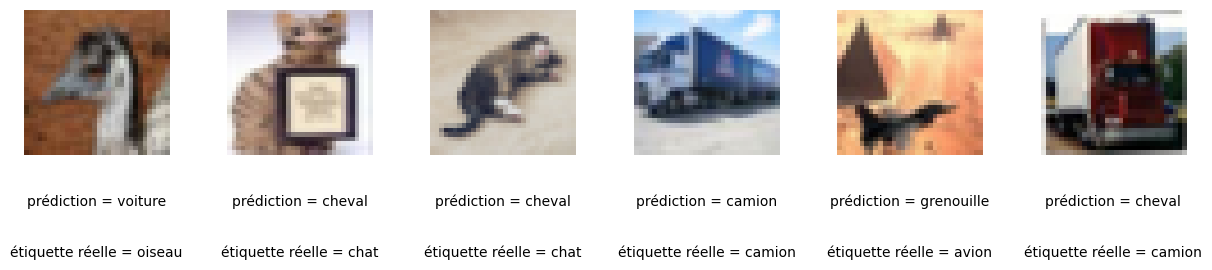

In [15]:
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

# Créer une figure pour afficher les images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Afficher les images avec leurs prédictions et étiquettes réelles
for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prédiction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "étiquette réelle = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)

# Afficher la figure
plt.show()


## CNN

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10

In [17]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation='softmax'))

In [18]:
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [19]:
epochs = 10
batch_size = 64

history_cnn = model_cnn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

Epoch 1/10
625/625 [==============================] - 41s 65ms/step - loss: 1.7202 - accuracy: 0.3682 - val_loss: 1.4249 - val_accuracy: 0.4982
Epoch 2/10
625/625 [==============================] - 44s 70ms/step - loss: 1.4232 - accuracy: 0.4865 - val_loss: 1.2369 - val_accuracy: 0.5698
Epoch 3/10
625/625 [==============================] - 37s 59ms/step - loss: 1.2855 - accuracy: 0.5425 - val_loss: 1.1165 - val_accuracy: 0.6027
Epoch 4/10
625/625 [==============================] - 42s 68ms/step - loss: 1.2011 - accuracy: 0.5719 - val_loss: 1.0555 - val_accuracy: 0.6261
Epoch 5/10
625/625 [==============================] - 41s 65ms/step - loss: 1.1322 - accuracy: 0.5987 - val_loss: 1.0402 - val_accuracy: 0.6323
Epoch 6/10
625/625 [==============================] - 35s 56ms/step - loss: 1.0830 - accuracy: 0.6193 - val_loss: 0.9831 - val_accuracy: 0.6532
Epoch 7/10
625/625 [==============================] - 43s 69ms/step - loss: 1.0402 - accuracy: 0.6305 - val_loss: 0.9438 - val_accuracy:

313/313 - 4s - loss: 0.8988 - accuracy: 0.6836 - 4s/epoch - 13ms/step
Précision sur les données de test : 68.36%


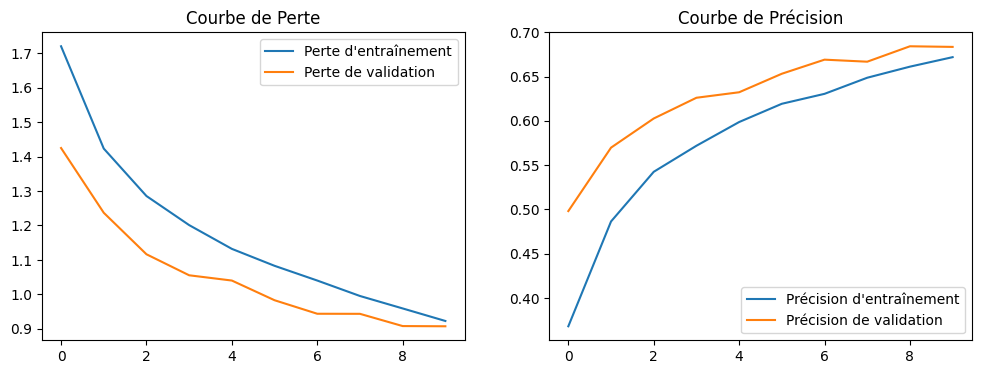

In [20]:
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

# Afficher les courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Perte d\'entraînement')
plt.plot(history_cnn.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history_cnn.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les classes
CLASSES = np.array([
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion",
])

# Prédire les classes pour les données de test
predictions = model_cnn.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 4s 12ms/step


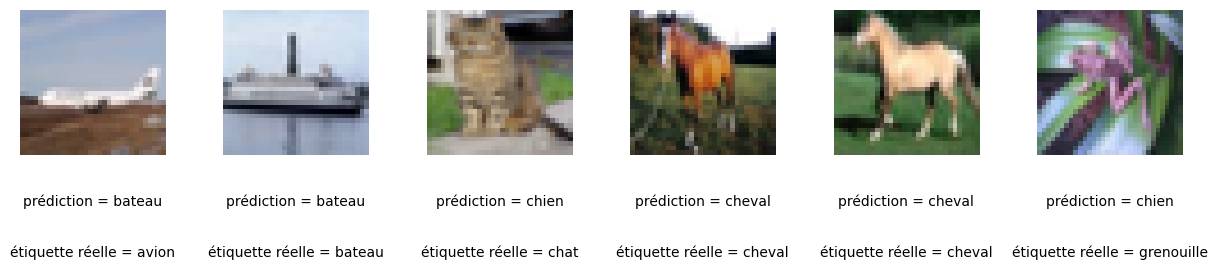

In [22]:
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

# Créer une figure pour afficher les images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Afficher les images avec leurs prédictions et étiquettes réelles
for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prédiction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "étiquette réelle = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)

# Afficher la figure
plt.show()

# OTHER TYPE OF CNN

In [23]:
from tensorflow import keras
from tensorflow.keras import layers, models

# Définir le nombre de classes
NUM_CLASSES = 10

# Créer la structure du modèle CNN avec Batch Normalization en utilisant Sequential()
model_cnn = models.Sequential()

# Couche de convolution 1 : 32 filtres, fenêtre 3x3, activation LeakyReLU, entrée 32x32x3
model_cnn.add(layers.Conv2D(32, (3, 3), strides=1, padding="same", input_shape=(32, 32, 3)))  # Ajouter une parenthèse ici
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Couche de convolution 2 : 32 filtres, fenêtre 3x3, activation LeakyReLU
model_cnn.add(layers.Conv2D(32, (3, 3), strides=2, padding="same"))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Couche de convolution 3 : 64 filtres, fenêtre 3x3, activation LeakyReLU
model_cnn.add(layers.Conv2D(64, (3, 3), strides=1, padding="same"))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Couche de convolution 4 : 64 filtres, fenêtre 3x3, activation LeakyReLU
model_cnn.add(layers.Conv2D(64, (3, 3), strides=2, padding="same"))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Aplatir les données pour les couches entièrement connectées
model_cnn.add(layers.Flatten())

# Couche dense 1 : 128 neurones, activation LeakyReLU
model_cnn.add(layers.Dense(128))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Couche de dropout pour la régularisation
model_cnn.add(layers.Dropout(rate=0.5))

# Couche de sortie : 10 neurones pour les classes, activation softmax
model_cnn.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# Afficher un résumé du modèle
model_cnn.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 32)       

In [24]:
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [25]:
epochs = 10
batch_size = 64

history_cnn = model_cnn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

Epoch 1/10
625/625 [==============================] - 110s 173ms/step - loss: 1.5452 - accuracy: 0.4553 - val_loss: 1.3167 - val_accuracy: 0.5276
Epoch 2/10
625/625 [==============================] - 94s 150ms/step - loss: 1.1535 - accuracy: 0.5911 - val_loss: 1.0345 - val_accuracy: 0.6325
Epoch 3/10
625/625 [==============================] - 95s 151ms/step - loss: 1.0036 - accuracy: 0.6493 - val_loss: 0.9566 - val_accuracy: 0.6648
Epoch 4/10
625/625 [==============================] - 101s 161ms/step - loss: 0.9127 - accuracy: 0.6799 - val_loss: 1.4130 - val_accuracy: 0.5468
Epoch 5/10
625/625 [==============================] - 98s 157ms/step - loss: 0.8517 - accuracy: 0.6999 - val_loss: 0.9413 - val_accuracy: 0.6707
Epoch 6/10
625/625 [==============================] - 89s 143ms/step - loss: 0.7996 - accuracy: 0.7208 - val_loss: 0.8911 - val_accuracy: 0.6919
Epoch 7/10
625/625 [==============================] - 119s 190ms/step - loss: 0.7443 - accuracy: 0.7404 - val_loss: 1.0255 - val

313/313 - 5s - loss: 0.8670 - accuracy: 0.7088 - 5s/epoch - 17ms/step
Précision sur les données de test : 70.88%


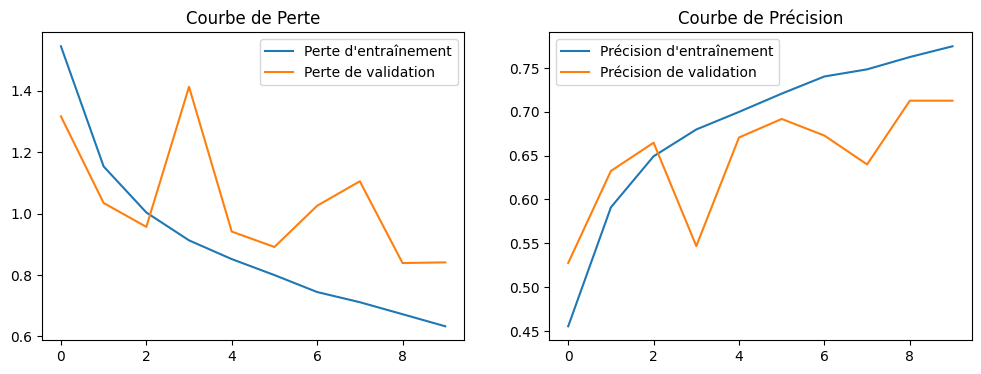

In [26]:
est_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

# Afficher les courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Perte d\'entraînement')
plt.plot(history_cnn.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history_cnn.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les classes
CLASSES = np.array([
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion",
])

# Prédire les classes pour les données de test
predictions = model_cnn.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 6s 20ms/step


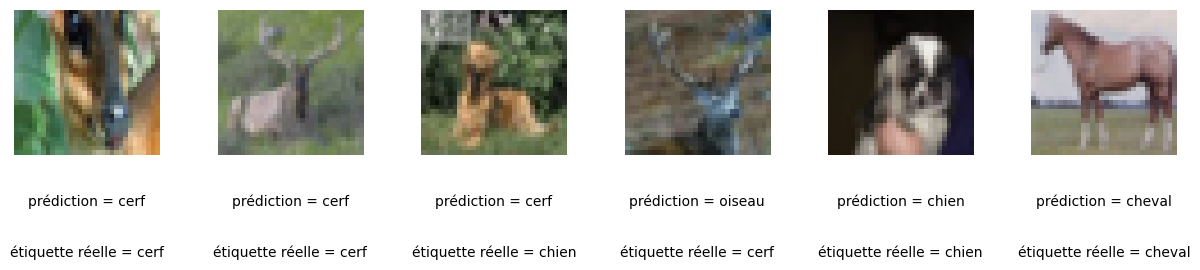

In [28]:
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

# Créer une figure pour afficher les images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Afficher les images avec leurs prédictions et étiquettes réelles
for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prédiction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "étiquette réelle = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)

# Afficher la figure
plt.show()

## TRANSFERT LEARNING, VG16

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

58889256/58889256 [==============================] - 0s 0us/step


In [30]:
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Geler les couches du modèle VGG16 pour empêcher leur entraînement
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle avec une fonction de perte, un optimiseur et des métriques
model_transfer.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [ ]:
epochs = 10
batch_size = 64

history_transfer = model_transfer.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_transfer.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['loss'], label='Perte d\'entraînement')
plt.plot(history_transfer.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history_transfer.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()